In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astra.plot.utils import latexify
import pandas as pd

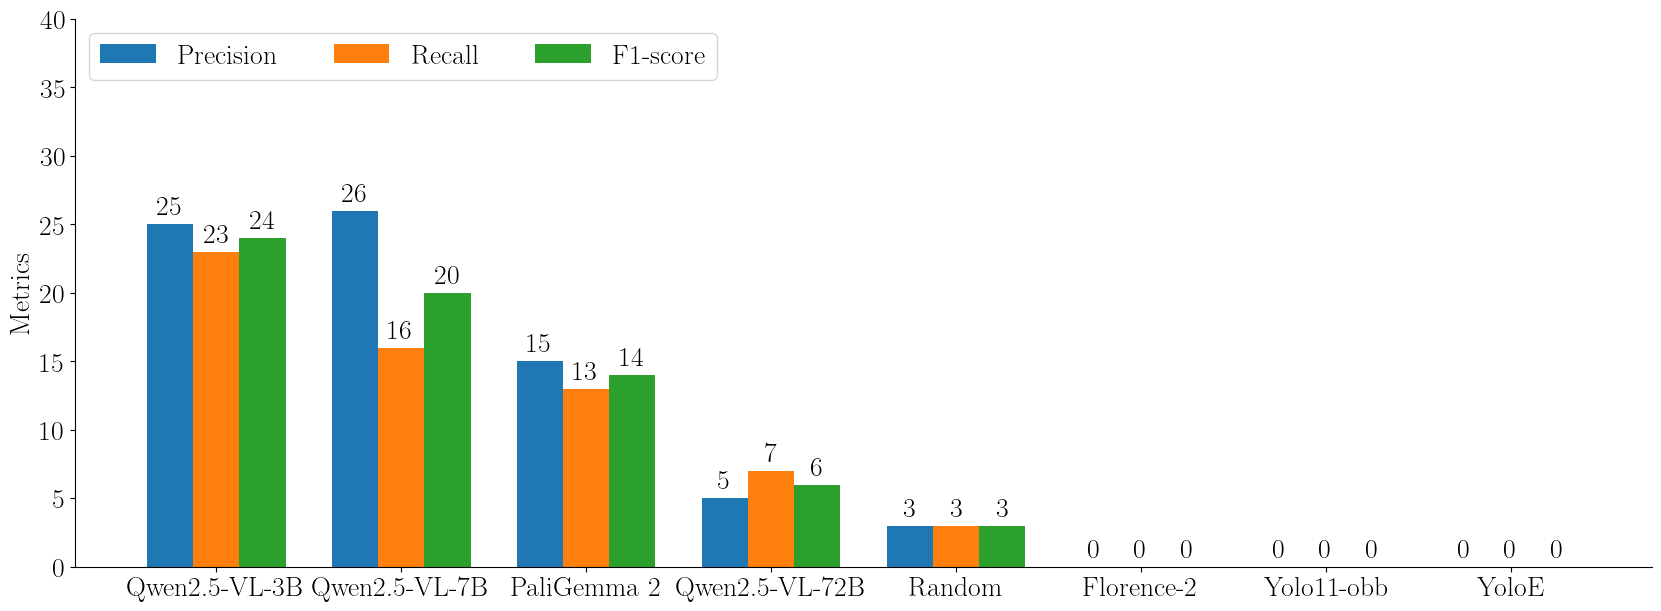

In [2]:
%matplotlib inline
latexify(16.5, 6, 20)

region = 'west_bengal'  # 'lucknow' or 'west_bengal'
models = ("Random", "PaliGemma 2", "Florence-2", "Qwen2.5-VL-3B", "Qwen2.5-VL-7B", "Qwen2.5-VL-72B", "Yolo11-obb", "YoloE")
if region == 'lucknow':
    metrics  = {
        'Precision': (3, 12, 0, 27, 33, 18, 0, 0),
        'Recall': (3, 12, 0, 28, 32, 28, 0, 0),
        'F1-score': (3, 12, 0, 28, 33, 22, 0, 0),
    }
elif region == 'west_bengal':
    metrics  = {
        'Precision': (3, 15, 0, 25, 26, 5, 0, 0),
        'Recall': (3, 13, 0, 23, 16, 7, 0, 0),
        'F1-score': (3, 14, 0, 24, 20, 6, 0, 0),
    }
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

# for attribute, measurement in metrics.items():
#     offset = width * multiplier
#     rects = ax.bar(x + offset, measurement, width, label=attribute)
#     ax.bar_label(rects, padding=3)
#     multiplier += 1


df = pd.DataFrame(metrics)
df['models'] = models
df.sort_values(by='F1-score', ascending=False, inplace=True)

# for attribute, color in [('Precision', '#ff0000'), ('Recall','#00ff00'), ('F1-score','#0000ff')]:
for attribute in [('Precision'), ('Recall'), ('F1-score')]:
    offset = width * multiplier
    rects = ax.bar(x + offset, df[attribute], width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics')
ax.set_xticks(x + width, df['models'])
ax.tick_params(axis='x', labelrotation=0)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 40)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.tight_layout()
plt.show()
fig.savefig(f'vlm_zero_shot_{region}.png', dpi = 300)

/tmp/ipykernel_683934/2001952059.py:49: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


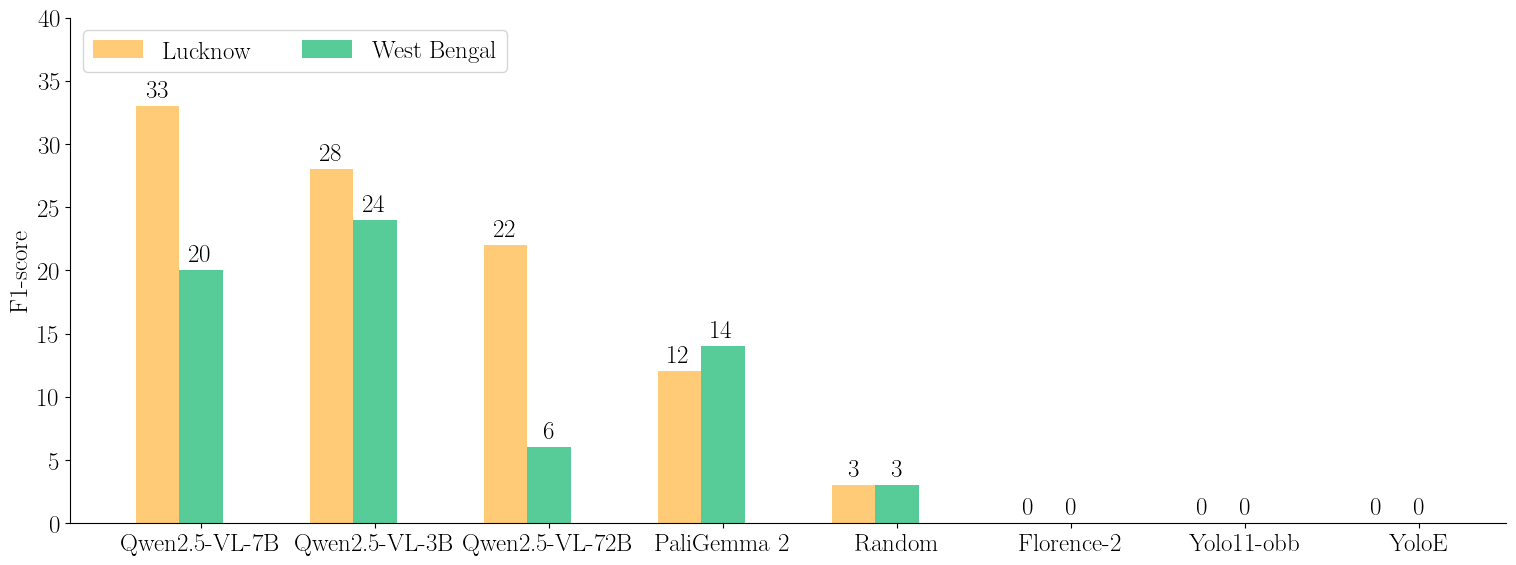

In [29]:
%matplotlib inline
latexify(15.5, 6, 18)

region = 'lucknow'  # 'lucknow' or 'west_bengal'
models = ("Random", "PaliGemma 2", "Florence-2", "Qwen2.5-VL-3B", "Qwen2.5-VL-7B", "Qwen2.5-VL-72B", "Yolo11-obb", "YoloE")
if region == 'lucknow':
    metrics  = {
        'Precision': (3, 12, 0, 27, 33, 18, 0, 0),
        'Recall': (3, 12, 0, 28, 32, 28, 0, 0),
        'F1-score': (3, 12, 0, 28, 33, 22, 0, 0),
    }
elif region == 'west_bengal':
    metrics  = {
        'Precision': (3, 15, 0, 25, 26, 5, 0, 0),
        'Recall': (3, 13, 0, 23, 16, 7, 0, 0),
        'F1-score': (3, 14, 0, 24, 20, 6, 0, 0),
    }
    
x = np.arange(len(models))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

df = pd.DataFrame({'Lucknow_Precision': [3, 12, 0, 27, 33, 18, 0, 0],
                   'Lucknow_Recall': [3, 12, 0, 28, 32, 28, 0, 0],
                   'Lucknow_F1_score': [3, 12, 0, 28, 33, 22, 0, 0],
                   'West_Bengal_Precision': [3, 15, 0, 25, 26, 5, 0, 0],
                   'West_Bengal_Recall': [3, 13, 0, 23, 16, 7, 0, 0],
                   'West_Bengal_F1_score': [3, 14, 0, 24, 20, 6, 0, 0],
                   'models': models})

df.sort_values(by='Lucknow_F1_score', ascending=False, inplace=True)

for attribute, color in [('Lucknow_F1_score', '#ffcb77'), ('West_Bengal_F1_score', '#57cc99')]:
    offset = width * multiplier
    rects = ax.bar(x + offset, df[attribute], width, label=attribute, color = color)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-score')
ax.set_xticks(x + width, df['models'])
ax.tick_params(axis='x', labelrotation=0)
ax.legend(labels = ['Lucknow', 'West Bengal'], loc='upper left', ncols=3)
ax.set_ylim(0, 40)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()